In [1]:
import csv
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from scipy import stats
from pprint import pprint


In [2]:
# cwd = os.getcwd()
cwd = '/data/co2flux/common/mdomhoef/Oslo'


In [3]:
test_file_path = cwd + '/Oslo_analysis/data/HH_Data_small/new_FLX_DK-Eng_FLUXNET2015_SUBSET_HH_2005-2008_1-4.csv'
print(test_file_path)
df = pd.read_csv(test_file_path)
df[df.loc[:, df.columns != 'date'] < -9998] = np.nan
df['date'] = pd.to_datetime(df.date)
df = df.iloc[: , 1:]

df.tail()

/data/co2flux/common/mdomhoef/Oslo/Oslo_analysis/data/HH_Data_small/new_FLX_DK-Eng_FLUXNET2015_SUBSET_HH_2005-2008_1-4.csv


,TIMESTAMP_START,TIMESTAMP_END,TA_F,TA_F_QC,SW_IN_F,VPD_F,TS_F_MDS_1,TS_F_MDS_1_QC,NEE_VUT_REF,NEE_VUT_REF_QC,RECO_NT_VUT_REF,GPP_NT_VUT_REF,RECO_DT_VUT_REF,GPP_DT_VUT_REF,date
70123,200812312130,200812312200,-0.911,2,0.0,0.568,NaN,NaN,1.62477,3,0.754010,-0.752974,NaN,NaN,2008-12-31 21:30:00
70124,200812312200,200812312230,-0.843,2,0.0,0.574,NaN,NaN,1.29025,3,0.759468,-0.412164,NaN,NaN,2008-12-31 22:00:00
70125,200812312230,200812312300,-0.769,2,0.0,0.585,NaN,NaN,1.69060,3,0.765433,-0.024992,NaN,NaN,2008-12-31 22:30:00
70126,200812312300,200812312330,-0.695,2,0.0,0.597,NaN,NaN,1.75998,3,0.771426,0.721252,NaN,NaN,2008-12-31 23:00:00
70127,200812312330,200901010000,-0.621,2,0.0,0.609,NaN,NaN,3.37764,3,0.777445,-1.967920,NaN,NaN,2008-12-31 23:30:00


## 1. Get Station names and file paths

In [4]:
stations_final = ['FI-Hyy', 'FI-Let', 'SE-Ros', 'SE-Svb', 'SE-Htm', 'SE-Nor']
paths_final = []
years_final = []
files = os.listdir(cwd +"/Oslo_analysis/data/HH_Data_small/")
for station in stations_final:
    matching = [s for s in files if station in s]
    paths_final.append(cwd +"/Oslo_analysis/data/HH_Data_small/"+matching[0]) 
    years_final.append(matching[0].partition("SET_HH_")[2].partition("_")[0])
    # for file in files:
#     print(file)
    # if file in stations_final:
    #     print(file)


In [5]:
stations=stations_final
paths = paths_final
years = years_final

In [6]:
paths[0]

'/data/co2flux/common/mdomhoef/Oslo/Oslo_analysis/data/HH_Data_small/new_FLX_FI-Hyy_FLUXNET2015_FULLSET_HH_1996-2020_beta-3.csv'

In [7]:
# stations=[]
# paths = []
# years = []
# files = os.listdir(cwd +"/Oslo_analysis/data/HH_Data_small/")
# for file in files:
#     if(file.startswith('new')):
#         path = cwd +"/Oslo_analysis/data/HH_Data_small/"+file
#         paths.append(path)
#         # df = pd.read_csv(path)
#         # df.replace(-9999.0,np.NaN)
#         stations.append(path.partition("FLX_")[2].partition("_FLUXNET")[0])
#         years.append(path.partition("SET_HH_")[2].partition("_")[0])
# print(stations)
# print(len(paths))
# print(years)

## 2. Plot NEE of Stations over years

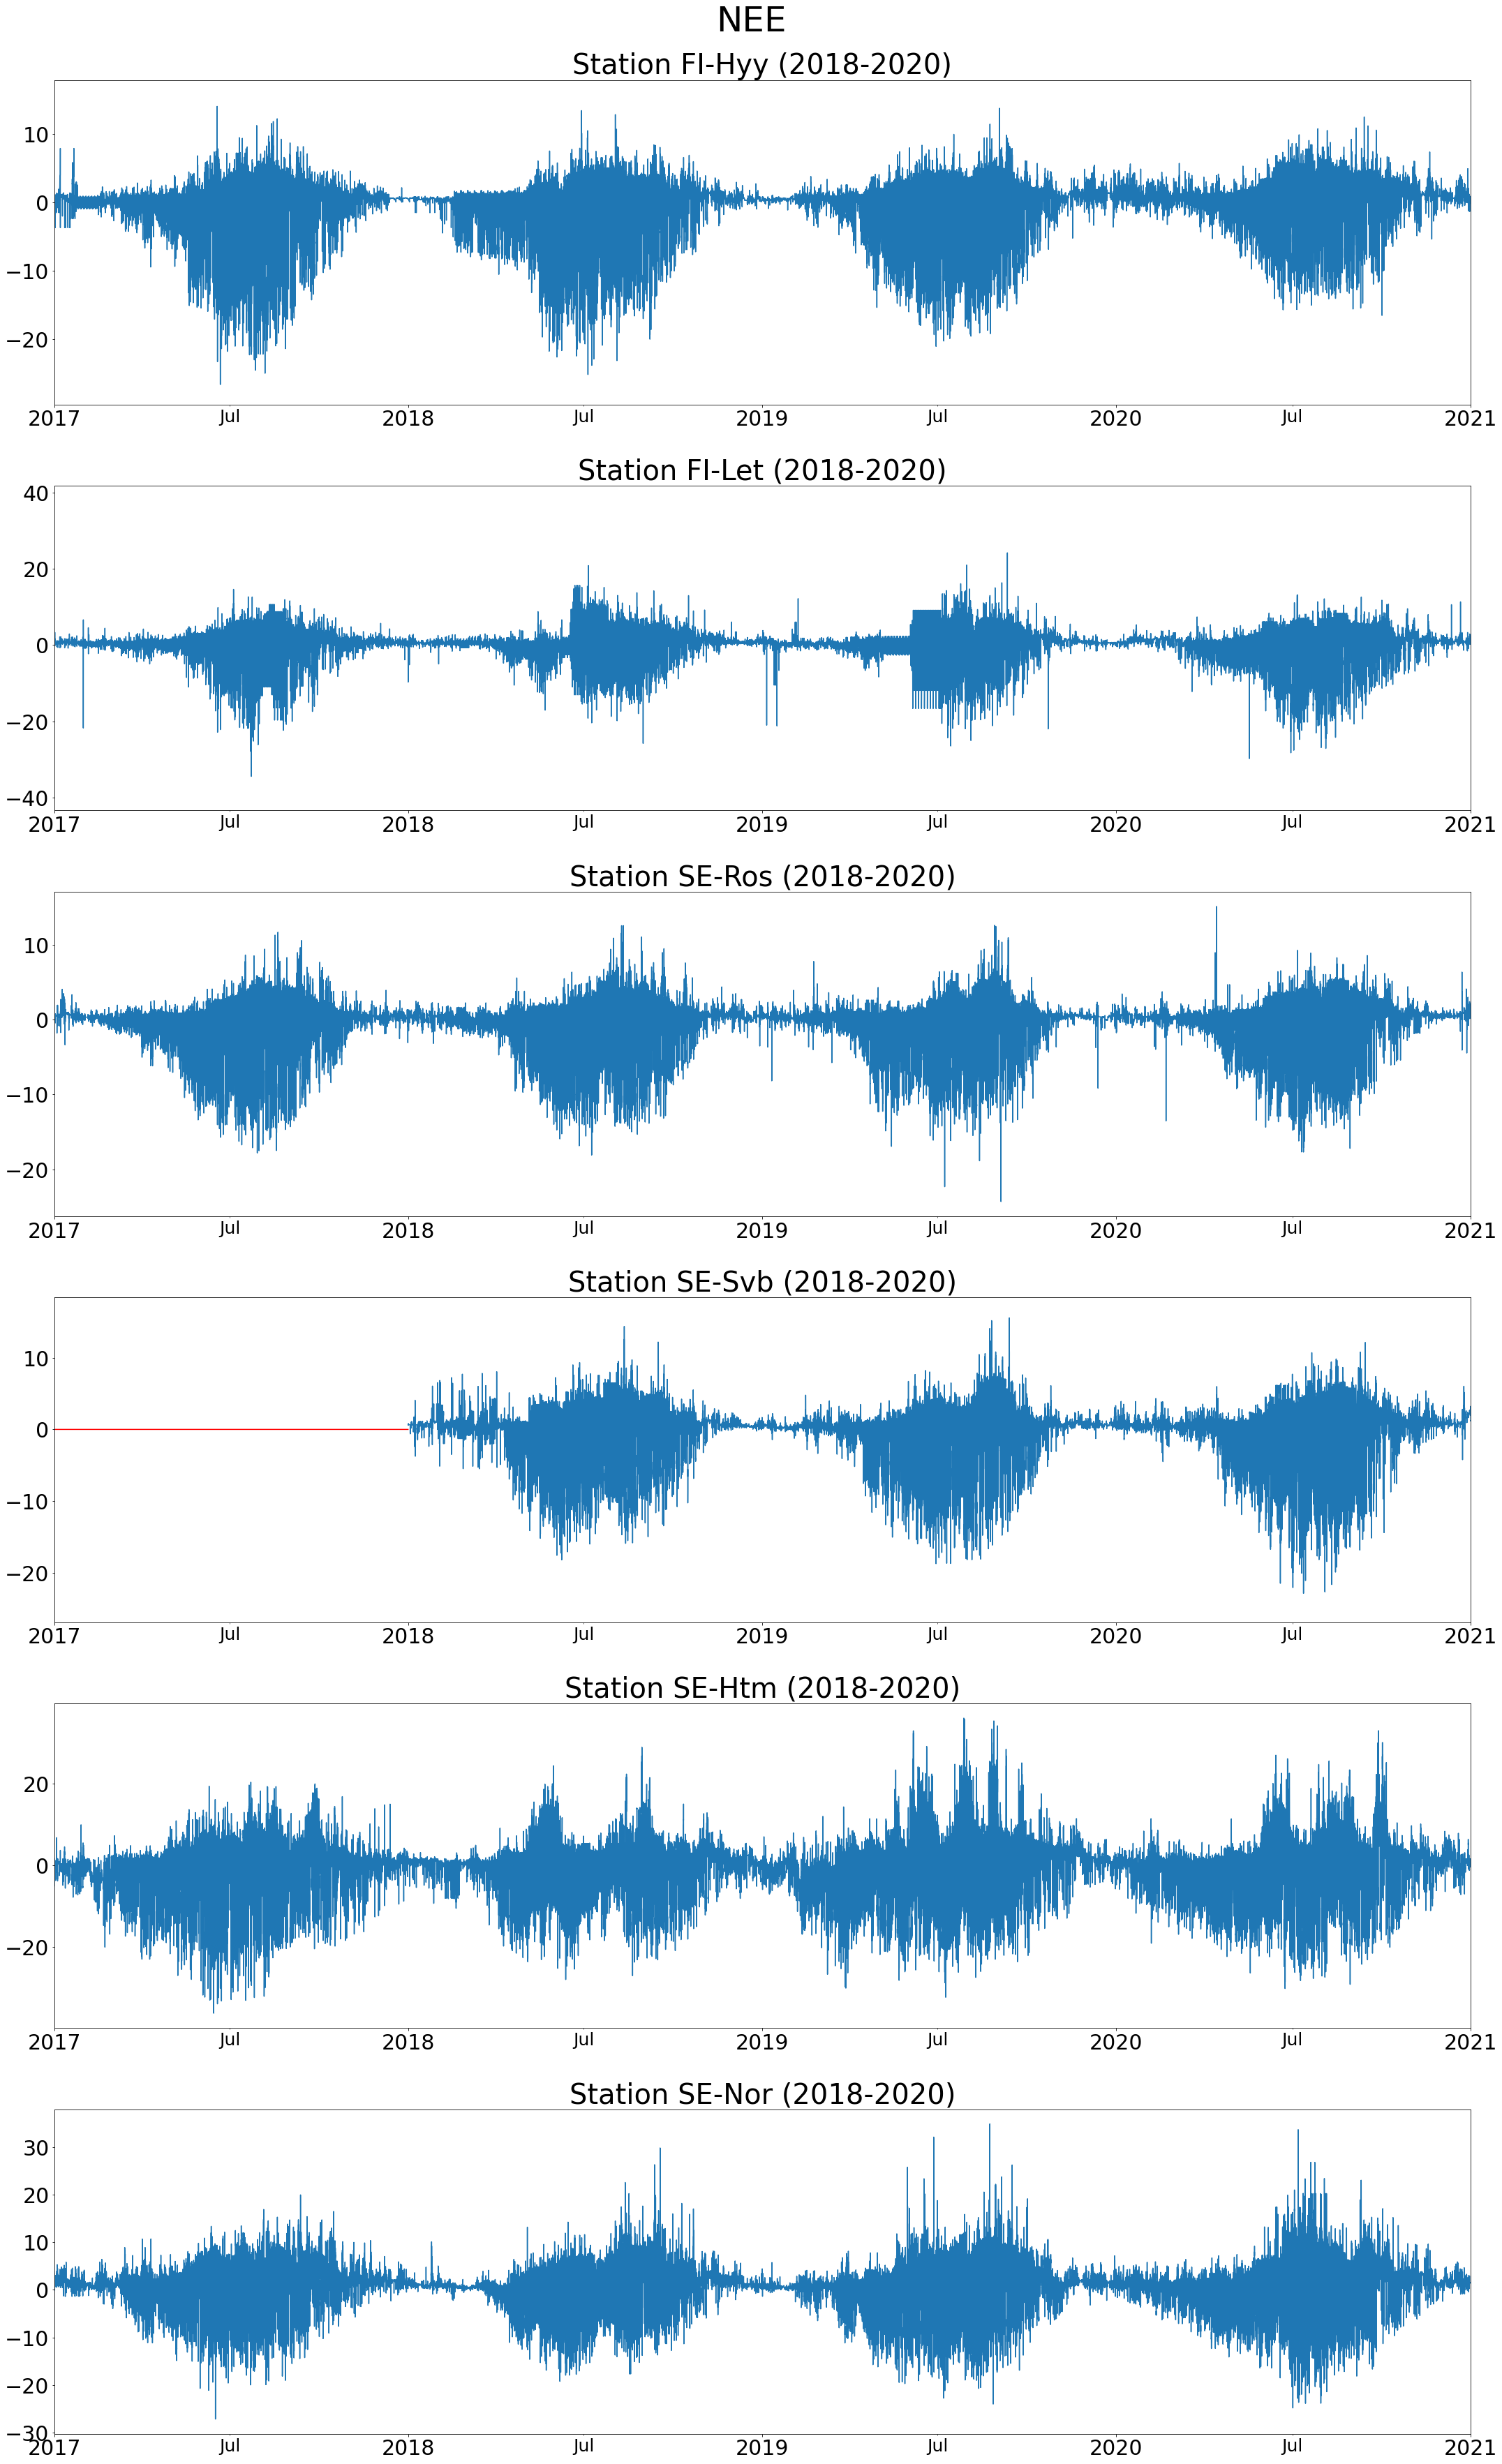

In [15]:
plt.rcParams['date.epoch'] = '0000-12-31T00:00:00'

fig, axs = plt.subplots(int(len(paths)), figsize = (30,50))
for i, ax in enumerate(axs.flat):
    df = pd.read_csv(paths[i])
    df[df.loc[:, df.columns != 'date'] < -9998] = np.nan
    df.loc[df['NEE_VUT_REF'].isna(), 'nans'] = 0

    # x = pd.to_datetime(df.date.iloc[:50])
    # y = df.NEE_VUT_REF.iloc[:50]
    # yn = df.nans.iloc[:50]

    x = pd.to_datetime(df.date)
    y = df.NEE_VUT_REF
    yn = df.nans

    ax.plot(x,y)
    ax.plot(x,yn, color= "red")

    ax.set_title(f'Station {stations[i]} (2018-2020)', fontsize=40 )
    ax.set_xlim('2017-01-01', '2021-01-01')

    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
    
    # if stations[i]!= "FI-Hyy":
    ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,7)))
    
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
    
    ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
    
    ax.tick_params(labelsize = 30)
    ax.tick_params(labelsize = 25, which ='minor')

    # plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    
    ## Rotate date labels automatically
    #fig.autofmt_xdate()
    
fig.tight_layout()
fig.subplots_adjust(top=0.95, hspace=0.25)
fig.suptitle("NEE", fontsize=50)
    
# plt.setp(axs[-1, :], xlabel='Year')
# plt.setp(axs[-1], xlabel='Year')
# plt.setp(axs[:, 0], ylabel='NEE')

plt.show()

## 3. Get NaN value frequency in variables of each stations

In [11]:
df_stats = pd.DataFrame()
df_stats_all = pd.DataFrame()
for i, j in enumerate(paths):
    df = pd.read_csv(j)
    df[df.loc[:, df.columns != 'date'] < -9998] = np.nan
    df = df.iloc[: , 1:]
    series = pd.Series(df.isna().sum(), name = stations[i])
    series['Total_Points'] = df.shape[0]
    series['Years'] = years[i]
    #hh = pd.Series(df.shape[0], name = 'Datapoints')
    df_stats = pd.concat([df_stats, series], axis = 1)
    df_stats_all[stations[i]] = pd.Series(df.isna().sum(), name = stations[i])
    
    # df_stats = pd.concat([df_stats, series

In [12]:
df_stats

,FI-Hyy,FI-Let,SE-Ros,SE-Svb,SE-Htm,SE-Nor
TIMESTAMP_START,0,0,0,0,0,0
TIMESTAMP_END,0,0,0,0,0,0
TA_F_MDS,3648,11040,7968,0,0,0
TA_F_MDS_QC,3648,11040,7968,0,0,0
TA_F,0,0,0,0,0,0
TA_F_QC,0,0,0,0,0,0
SW_IN_F_MDS,3638,11031,7964,0,0,0
SW_IN_F,0,0,0,0,0,0
VPD_F_MDS,3648,11040,7968,0,6704,0
VPD_F,0,0,0,0,0,0


In [13]:
df_stats_all.loc["Total_Points"] = df_stats.loc["Total_Points"]
df_stats_all.loc["Years"] = df_stats.loc["Years"]

In [14]:
df_stats_all

,FI-Hyy,FI-Let,SE-Ros,SE-Svb,SE-Htm,SE-Nor
TIMESTAMP_START,0,0.0,0.0,0,0,0
TIMESTAMP_END,0,0.0,0.0,0,0,0
TA_F_MDS,3648,11040.0,7968.0,0,0,0
TA_F_MDS_QC,3648,11040.0,7968.0,0,0,0
TA_F,0,0.0,0.0,0,0,0
TA_F_QC,0,0.0,0.0,0,0,0
SW_IN_F_MDS,3638,11031.0,7964.0,0,0,0
SW_IN_F,0,0.0,0.0,0,0,0
VPD_F_MDS,3648,11040.0,7968.0,0,6704,0
VPD_F,0,0.0,0.0,0,0,0


## 4. Nan value counts of most important variables 

In [15]:
df_stats_all.loc[['NEE_VUT_REF','RECO_NT_VUT_REF','GPP_NT_VUT_REF', 'Years']]

,FI-Hyy,FI-Let,SE-Ros,SE-Svb,SE-Htm,SE-Nor
NEE_VUT_REF,0,0.0,0.0,17520,0,0
RECO_NT_VUT_REF,0,0.0,0.0,0,0,0
GPP_NT_VUT_REF,0,0.0,0.0,0,0,0
Years,1996-2020,2009-2020,2014-2020,2014-2020,2015-2020,2014-2020


FI_Let(2009 -2018 ) the years 2013,2014,2015,2016 are missing

SE-Svb(2014 - 2018) the year 2017 is missing 

DK-GDs(2020) RECO data is missing 

In [16]:
df.date = pd.to_datetime(df.date)
df['year'] = df['date'].dt.year
print(df.shape)


(122736, 28)


In [17]:
# sns.countplot(x='NEE_VUT_REF_QC',data=df)
# sns.countplot(x='year', hue='NEE_VUT_REF_QC',data=df)

## 5. Plotting the NEE Quality tag frequency over years

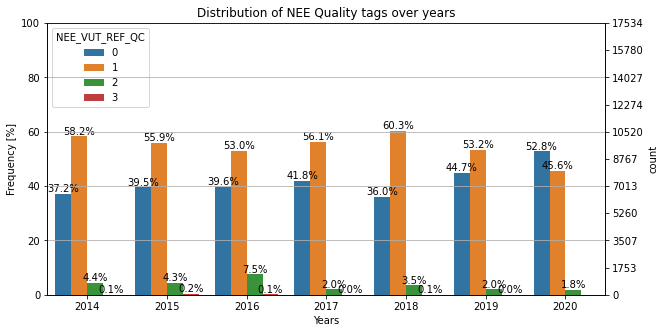

In [18]:
nyears = df.year.nunique()
ncount = len(df.NEE_VUT_REF_QC)/nyears


plt.figure(figsize=(10,5))
ax = sns.countplot(x='year', hue='NEE_VUT_REF_QC', data=df)#, order=[3,4,5,6,7,8,9,10,11,12])
plt.title('Distribution of NEE Quality tags over years')
plt.xlabel('Years')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

#ax2.set_ylim(0,50)
#ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
# ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

# plt.savefig('snscounter.pdf')

Text(0.5, 0.98, 'Distribution of NEE Quality tags over years')

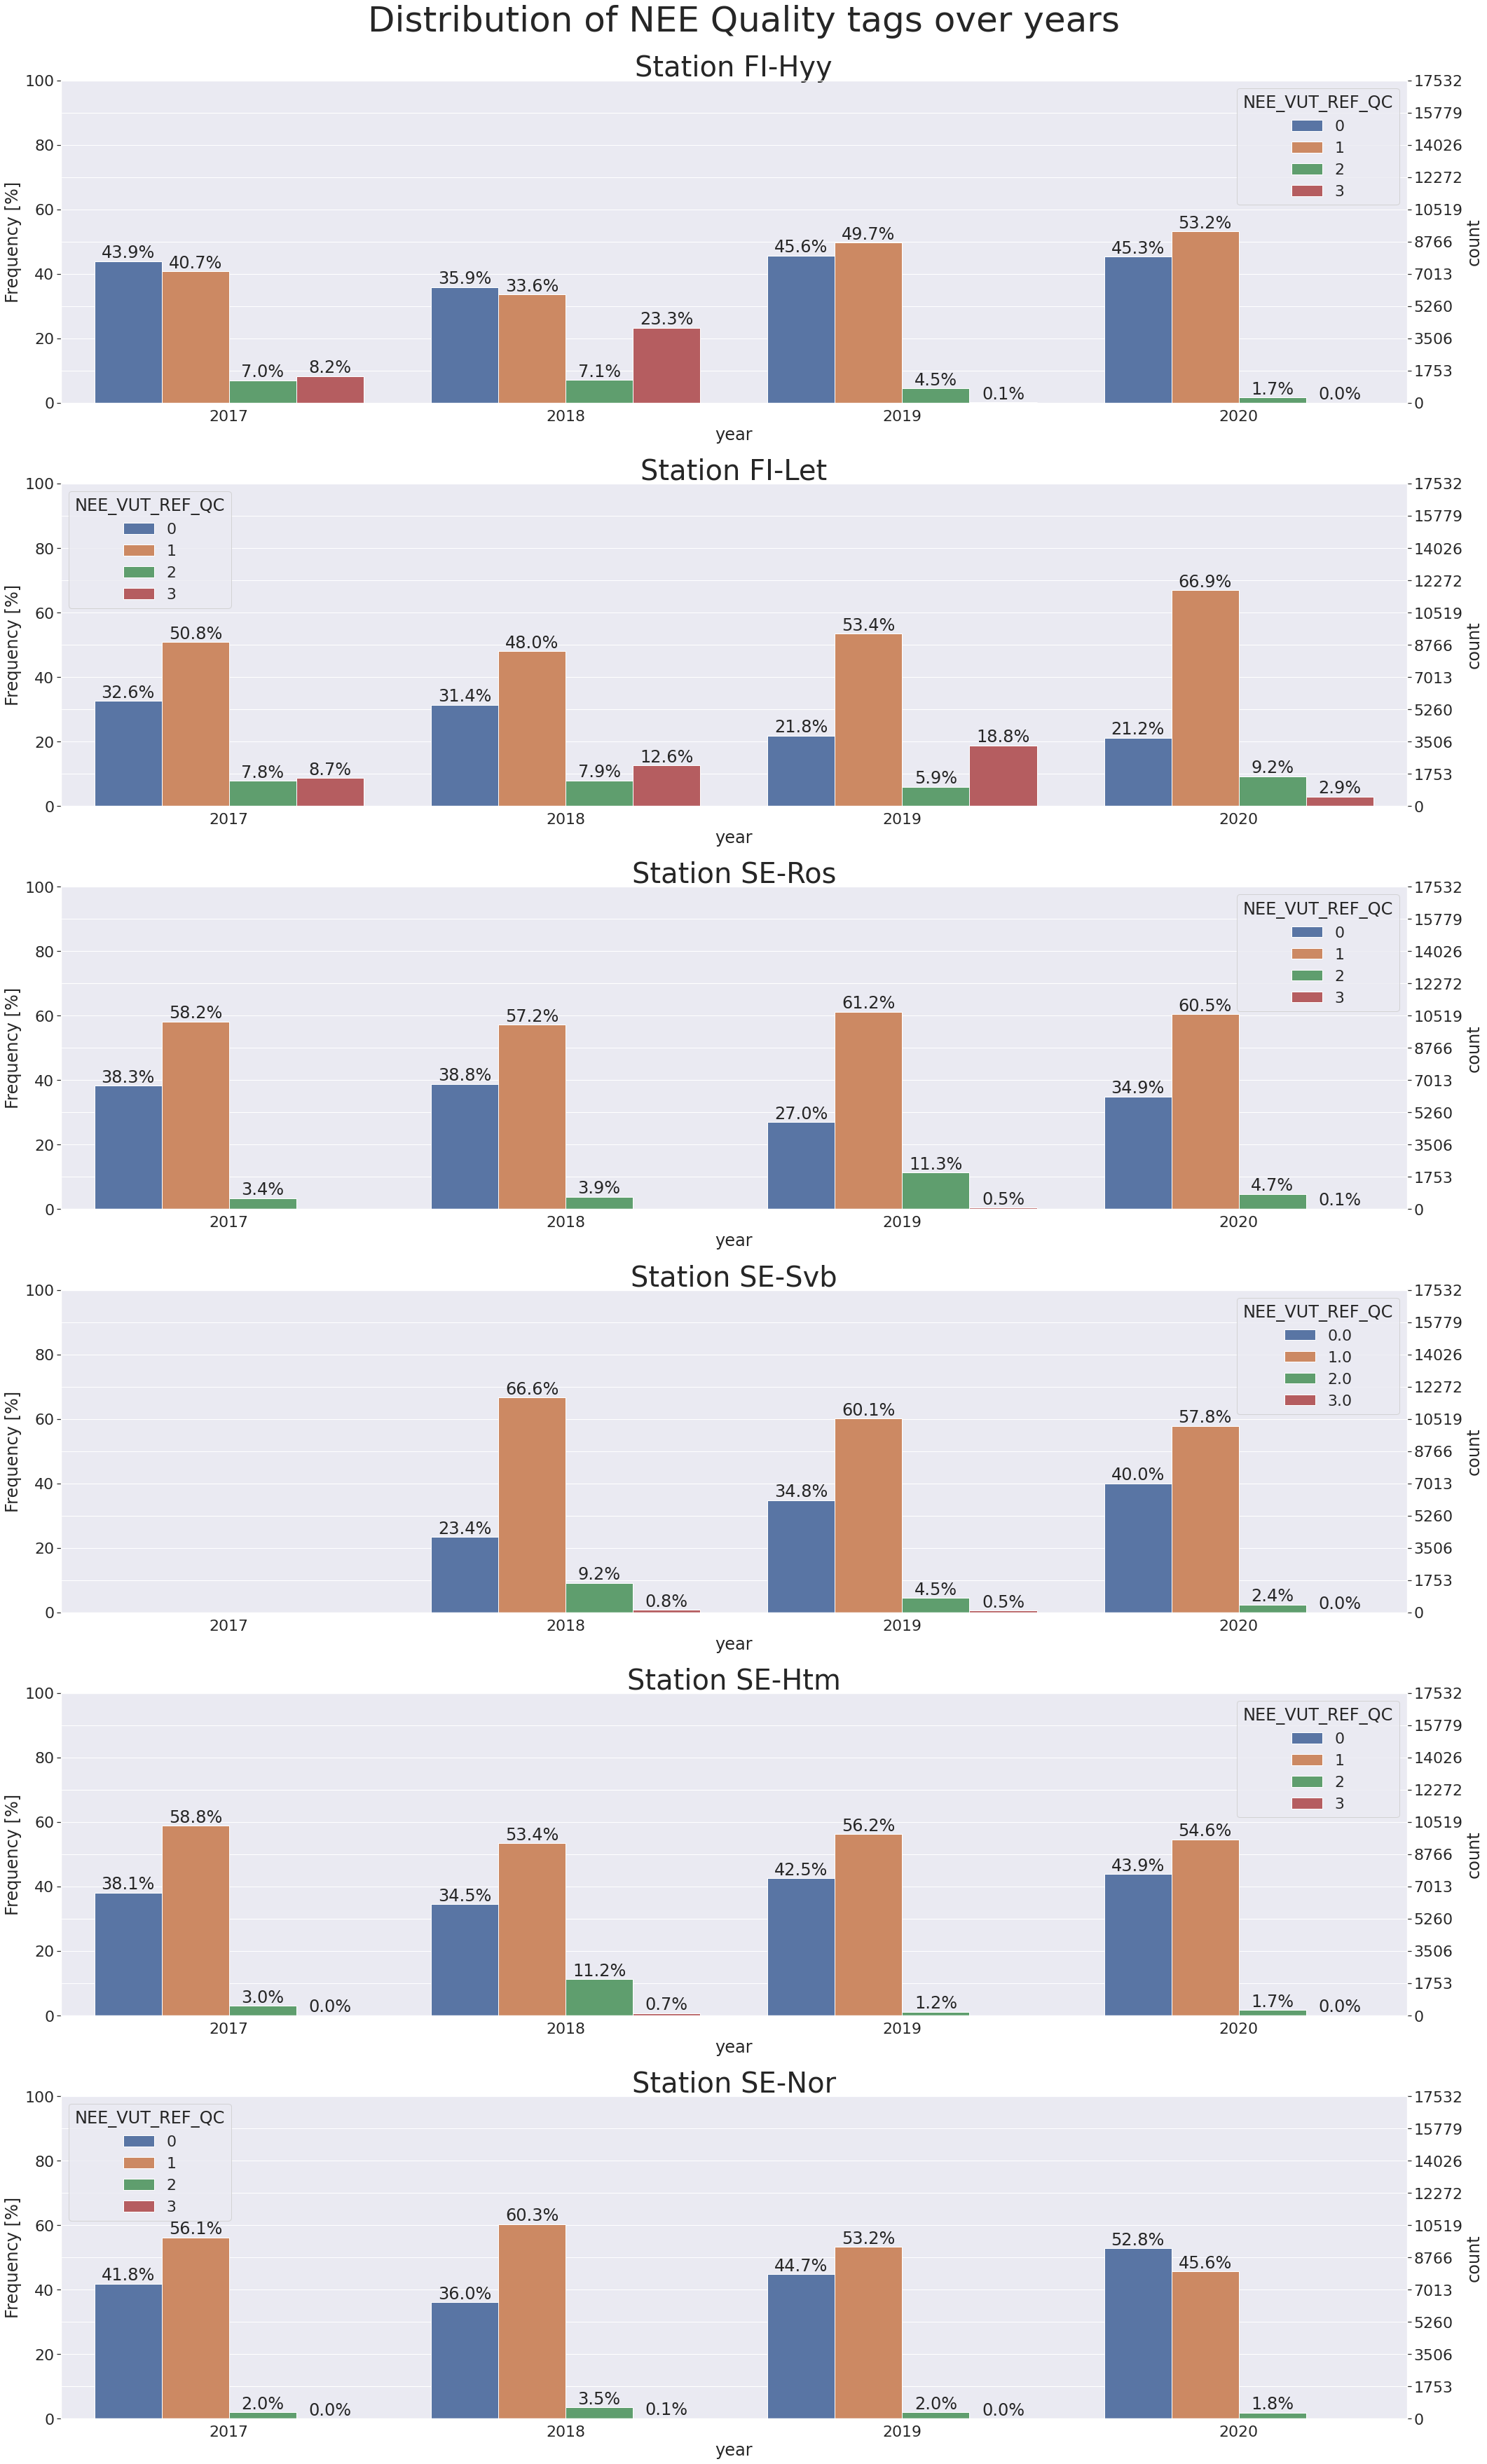

In [22]:
fig, axs = plt.subplots(int(len(paths)), figsize = (30,50))
# fig, axs = plt.subplots(int(len(paths)), figsize = (150,50))

for i, ax in enumerate(axs.flat):
    df = pd.read_csv(paths[i])
    df[df.loc[:, df.columns != 'date'] < -9998] = np.nan
    df.date = pd.to_datetime(df.date)
    df['year'] = df['date'].dt.year
    df = df[df['year'] > 2016]
    
    nyears = df.year.nunique()
    ncount = len(df.NEE_VUT_REF_QC)/nyears

    #plt.figure(figsize=(12,8))
    # sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
    sns.countplot(ax = ax, x='year', hue='NEE_VUT_REF_QC', data=df)#, order=[3,4,5,6,7,8,9,10,11,12])
    # sns.set(font_scale=2)
    ax.set_title(f'Station {stations[i]}', fontsize=40) #, years[i]
    
    # ax.set_fontsize(20)
    # plt.xlabel('Years')

    # Make twin axis
    ax2=ax.twinx()
    
    # ax2.set_fontsize(20)

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))

    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)

    #ax2.set_ylim(0,50)
    #ax.set_ylim(0,ncount/2)

    # And use a MultipleLocator to ensure a tick spacing of 10
    # ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

fig.tight_layout()
fig.subplots_adjust(top=0.95, hspace=0.25)
fig.suptitle("Distribution of NEE Quality tags over years", fontsize=50)

    # plt.title(')


In [17]:
# print(cwd)
fig.savefig(cwd +'/Oslo_analysis/figures/'+'stations_quality_tags.png')

#### Take out years:
Deg, Nor, Lnn, Htm: fine <br> 
Let: 2009 <br>
Ros: 2014 <br>
Hyy: 1996, 2018?  <br>
Svb: 2014, 2017 <br> 
Qvd: 2018 

#### Take out stations: 
Eng <br>
Fou <br>
Jok <br>
Gds: 2020 -> only dt data exists <br>

In [18]:
df[df.loc[:, df.columns != 'date'] < -9998] = np.nan
df.columns


Index(['Unnamed: 0', 'TIMESTAMP_START', 'TIMESTAMP_END', 'TA_F_MDS',
       'TA_F_MDS_QC', 'TA_F', 'TA_F_QC', 'SW_IN_F_MDS', 'SW_IN_F', 'VPD_F_MDS',
       'VPD_F', 'TS_F_MDS_1', 'TS_F_MDS_2', 'TS_F_MDS_3', 'TS_F_MDS_4',
       'TS_F_MDS_5', 'TS_F_MDS_1_QC', 'TS_F_MDS_2_QC', 'TS_F_MDS_3_QC',
       'TS_F_MDS_4_QC', 'TS_F_MDS_5_QC', 'NEE_VUT_REF', 'NEE_VUT_REF_QC',
       'RECO_NT_VUT_REF', 'GPP_NT_VUT_REF', 'RECO_DT_VUT_REF',
       'GPP_DT_VUT_REF', 'date', 'year'],
      dtype='object')

#### Analysis of difefrence between NT and DT

In [19]:
df[['RECO_NT_VUT_REF','RECO_DT_VUT_REF']].describe()

,RECO_NT_VUT_REF,RECO_DT_VUT_REF
count,1.052160e+05,105216.000000
mean,5.124953e+00,4.112571
std,4.586462e+00,3.652395
min,2.110320e-07,0.026133
25%,1.587897e+00,1.282535
50%,3.851050e+00,2.960295
75%,7.231515e+00,5.878190
max,3.517520e+01,27.082600


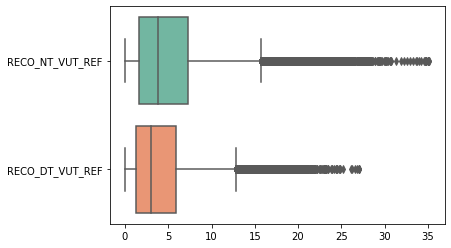

In [20]:
ax = sns.boxplot(data=df[['RECO_NT_VUT_REF','RECO_DT_VUT_REF']], orient="h", palette="Set2")

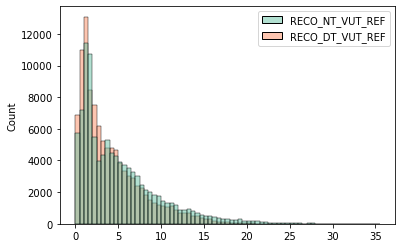

In [21]:
ax = sns.histplot(data=df[['RECO_NT_VUT_REF','RECO_DT_VUT_REF']], stat= 'count', palette="Set2", binwidth = 0.5 )

In [22]:
#Thest for normal distribution
stat, p = stats.shapiro(df['RECO_NT_VUT_REF'])
p

/nfs/pic.es/user/m/mdomhoef/.conda/envs/env/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [23]:
stat, p = stats.shapiro(df['RECO_DT_VUT_REF'])
p

0.0

The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05.
The test shows we cannot assume normality. 
An appropriate alternative to use would be the Wilcoxon signed-rank Test. It is a non-parametric version of the paired T-test.

In [24]:
#It is easier to see if there are any deviations from normality when the data is plotted as a q-q plot.
# stats.probplot(df['RECO_NT_VUT_REF'], dist="norm", plot=plt)
# plt.title("RECO_NT_VUT_REF Q-Q Plot")
# stats.probplot(df['RECO_DT_VUT_REF'], dist="norm", plot=plt)
# plt.title("RECO_DT_VUT_REF Q-Q Plot")

In [25]:
#Test for significant difference between NT and DT data 
stat, p = stats.wilcoxon(df['RECO_NT_VUT_REF'],df['RECO_DT_VUT_REF'])
p

0.0

Since the p-value is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that the true mean is not equal between the two groups (NT and DT). This might be due to the size of the dataset. The p value gets closer to zero the bigger the dataset. 

In [26]:
df_sample = df.sample(n = 1000)
stat_sample, p_sample = stats.wilcoxon(df_sample['RECO_NT_VUT_REF'],df_sample['RECO_DT_VUT_REF'])
p_sample

2.061521792744539e-39

In [27]:
# dataset1 = df['RECO_NT_VUT_REF']
# dataset2 = df['RECO_DT_VUT_REF']
# pprint ([(i, stats.wilcoxon(dataset1[:i], dataset2[:i])[1]) for i in range(100,len(dataset2),100)])
#in this case even with small size, we have a p value less than 0.05
# df[['date','RECO_NT_VUT_REF','RECO_DT_VUT_REF']].head()

In [28]:
# stats.ttest_rel(df['RECO_NT_VUT_REF'],df['RECO_DT_VUT_REF'])

In [29]:
df_dtnt = pd.DataFrame()
for i, j in enumerate(paths):
    df = pd.read_csv(j)
    df[df.loc[:, df.columns != 'date'] < -9998] = np.nan
    df = df.iloc[: , 1:]
    stat, p = stats.wilcoxon(df['RECO_NT_VUT_REF'],df['RECO_DT_VUT_REF'])
    stat_GPP, p_GPP = stats.wilcoxon(df['GPP_NT_VUT_REF'],df['GPP_DT_VUT_REF'])

    df_sample = df.sample(n = 1000)
    stat_sample, p_sample = stats.wilcoxon(df_sample['RECO_NT_VUT_REF'],df_sample['RECO_DT_VUT_REF'])
    stat_GPP_sample, p_GPP_sample = stats.wilcoxon(df_sample['GPP_NT_VUT_REF'],df_sample['GPP_DT_VUT_REF'])

    #hh = pd.Series(df.shape[0], name = 'Datapoints')
    series = pd.Series(name = stations[i], dtype = 'float64')
    series['Total_DataPoints'] = df.shape[0]
    series['Stat_RECO'] =  stat
    series['p-value_RECO'] = p 
    series['H0_rejected_RECO'] = np.where(series['p-value_RECO']<0.05, True, False)
    series['Stat sample_RECO'] =  stat_sample
    series['p-value_sample_RECO'] = p_sample
    series['H0_rejected_sample_RECO'] = np.where(series['p-value_sample_RECO']<0.05, True, False)
    
    series['Stat_GPP'] =  stat_GPP
    series['p-value_GPP'] = p_GPP 
    series['H0_rejected_GPP'] = np.where(series['p-value_GPP']<0.05, True, False)
    series['Stat sample_GPP'] =  stat_GPP_sample
    series['p-value_sample_GPP'] = p_GPP_sample
    series['H0_rejected sample_GPP'] = np.where(series['p-value_sample_GPP']<0.05, True, False)
    
    df_dtnt = pd.concat([df_dtnt, series], axis = 1)
    # df_stats_all[stations[i]] = pd.Series(df.isna().sum(), name = stations[i])
    
    

In [30]:
df_dtnt

,FI-Jok,DK-Eng,SE-Deg,SE-Nor,SE-Lnn,FI-Let,SE-Ros,DK-Gds,FI-Hyy,DK-Fou,SE-Svb,FI-Qvd,SE-Htm
Total_DataPoints,70128.0,70128.0,350640.0,122736.0,87648.0,210384.0,122736.0,17568.0,438336.0,17520.0,122736.0,52608.0,105216.0
Stat_RECO,925643727.0,300708814.5,25315969859.0,1389607903.5,1364300204.0,8092830274.0,3086985839.0,0.0,44414849680.5,62748716.0,1605211011.0,556637021.5,1490551628.0
p-value_RECO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H0_rejected_RECO,True,True,True,True,True,True,True,True,True,True,True,True,True
Stat sample_RECO,206192.0,52098.0,195811.0,98161.5,183621.5,191078.0,199454.5,0.0,222386.0,211112.0,100739.0,189290.0,137161.5
p-value_sample_RECO,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002288,0.000018,0.0,0.0,0.0
H0_rejected_sample_RECO,True,True,True,True,True,True,True,True,True,True,True,True,True
Stat_GPP,1014700315.5,298738024.5,29214176282.5,2784656907.5,1847017499.5,10730512717.0,3561594899.0,0.0,46632149094.5,68337120.5,2456175363.0,639007568.0,2140987892.5
p-value_GPP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H0_rejected_GPP,True,True,True,True,True,True,True,True,True,True,True,True,True


In [31]:
df.date = pd.to_datetime(df.date)
df['year'] = df['date'].dt.year
df.columns
# pd.unique(df.year)

Index(['TIMESTAMP_START', 'TIMESTAMP_END', 'TA_F_MDS', 'TA_F_MDS_QC', 'TA_F',
       'TA_F_QC', 'SW_IN_F_MDS', 'SW_IN_F', 'VPD_F_MDS', 'VPD_F', 'TS_F_MDS_1',
       'TS_F_MDS_2', 'TS_F_MDS_3', 'TS_F_MDS_4', 'TS_F_MDS_5', 'TS_F_MDS_1_QC',
       'TS_F_MDS_2_QC', 'TS_F_MDS_3_QC', 'TS_F_MDS_4_QC', 'TS_F_MDS_5_QC',
       'NEE_VUT_REF', 'NEE_VUT_REF_QC', 'RECO_NT_VUT_REF', 'GPP_NT_VUT_REF',
       'RECO_DT_VUT_REF', 'GPP_DT_VUT_REF', 'date', 'year'],
      dtype='object')

In [59]:
years = [str(i) for i in range(1996,2021)]

df_years = pd.DataFrame(index = years, columns = stations)
for i, j in enumerate(paths):
    df = pd.read_csv(j)
    df.date = pd.to_datetime(df.date)
    df['year'] = df['date'].dt.year
    years_h = [str(i) for i in pd.unique(df.year)]
    station = stations[i]
    df_years.at[years_h, station] = 1


In [60]:
df_years

,FI-Jok,DK-Eng,SE-Deg,SE-Nor,SE-Lnn,FI-Let,SE-Ros,DK-Gds,FI-Hyy,DK-Fou,SE-Svb,FI-Qvd,SE-Htm
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2001,1,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2002,1,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2003,1,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2004,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
2005,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


In [61]:
# Take out stations:
df_years = df_years.drop(['DK-Eng', 'DK-Fou', 'FI-Jok', 'DK-Gds'], axis = 1)


In [62]:
# Take out years:
# Deg, Nor, Lnn, Htm: fine
# Hyy: 1996, 2018?

df_years.at['1996', 'FI-Hyy'] = np.nan
df_years.at['2009', 'FI-Let'] = np.nan
df_years.at['2014', 'SE-Ros'] = np.nan 
df_years.at['2018', 'FI-Qvd'] = np.nan 
df_years.at[['2014', '2017'], 'SE-Svb'] = np.nan

In [63]:
df_years.to_csv("Station_years.csv")

In [64]:
df_years['total'] = df_years.sum(axis=1)

In [65]:
df_years

,SE-Deg,SE-Nor,SE-Lnn,FI-Let,SE-Ros,FI-Hyy,SE-Svb,FI-Qvd,SE-Htm,total
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1997,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1.0
1998,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1.0
1999,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1.0
2000,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1.0
2001,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2.0
2002,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2.0
2003,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2.0
2004,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2.0
2005,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2.0


In [66]:
df_years = df_years.loc[['2014', '2015', '2016','2017','2018', '2019', '2020']]
df_years

,SE-Deg,SE-Nor,SE-Lnn,FI-Let,SE-Ros,FI-Hyy,SE-Svb,FI-Qvd,SE-Htm,total
2014,1,1,1,1,NaN,1,NaN,NaN,NaN,5.0
2015,1,1,1,1,1,1,1,NaN,1,8.0
2016,1,1,1,1,1,1,1,NaN,1,8.0
2017,1,1,1,1,1,1,NaN,NaN,1,7.0
2018,1,1,1,1,1,1,1,NaN,1,8.0
2019,1,1,NaN,1,1,1,1,1,1,8.0
2020,1,1,NaN,1,1,1,1,1,1,8.0


In [67]:
df_IGBP = pd.DataFrame(index = ['CRO', 'GRA', 'ENF'], columns = stations)
stations_e = ['FI-Hyy', 'FI-Let', 'SE-Ros', 'SE-Svb', 'SE-Htm' , 'SE-Nor']
stations_c = ['SE-Lnn', 'FI-Qvd']
stations_g = ['SE-Deg'] 
df_IGBP.at['ENF' , stations_e] = 1
df_IGBP.at['CRO' , stations_c] = 1
df_IGBP.at['GRA' , stations_g] = 1
df_IGBP['total'] = df_IGBP.sum(axis=1)

df_IGBP

,FI-Jok,DK-Eng,SE-Deg,SE-Nor,SE-Lnn,FI-Let,SE-Ros,DK-Gds,FI-Hyy,DK-Fou,SE-Svb,FI-Qvd,SE-Htm,total
CRO,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2.0
GRA,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
ENF,NaN,NaN,NaN,1,NaN,1,1,NaN,1,NaN,1,NaN,1,6.0


In [68]:
df_new = pd.concat([df_years, df_IGBP]).T

In [69]:
df_new.loc[df_new['CRO'] == 1].T

,SE-Lnn,FI-Qvd
2014,1,NaN
2015,1,NaN
2016,1,NaN
2017,1,NaN
2018,1,NaN
2019,NaN,1
2020,NaN,1
CRO,1,1
GRA,NaN,NaN
ENF,NaN,NaN


In [70]:
df_new.loc[df_new['ENF'] == 1].T

,SE-Nor,FI-Let,SE-Ros,FI-Hyy,SE-Svb,SE-Htm
2014,1,1,NaN,1,NaN,NaN
2015,1,1,1,1,1,1
2016,1,1,1,1,1,1
2017,1,1,1,1,NaN,1
2018,1,1,1,1,1,1
2019,1,1,1,1,1,1
2020,1,1,1,1,1,1
CRO,NaN,NaN,NaN,NaN,NaN,NaN
GRA,NaN,NaN,NaN,NaN,NaN,NaN
ENF,1,1,1,1,1,1


In [71]:
df_new.loc[df_new['GRA'] == 1].T

,SE-Deg,total
2014,1,5.0
2015,1,8.0
2016,1,8.0
2017,1,7.0
2018,1,8.0
2019,1,8.0
2020,1,8.0
CRO,NaN,2.0
GRA,1,1.0
ENF,NaN,6.0
